# Flower Classification using Tensorflow And OpenCV


In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

The tutorial that i used for this project:https://www.youtube.com/watch?v=mTVf7BN7S8w&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=26&ab_channel=codebasics


You can download the dataset from :https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

 In below image, 4 new training samples are generated from original sample using different transformations



![](flower_classification.png)


In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 38.2/38.2 MB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 95s 0us/step


The above get_file method in tensorflow will download the dataset in the provided url

In [7]:
data_dir

'.\\datasets\\flower_photos'

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

if i only want jpg images i can use the following thing

In [10]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

if you want only roses images 

In [13]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

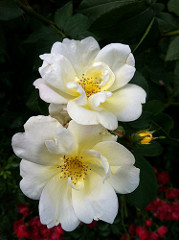

In [14]:
PIL.Image.open(str(roses[0]))

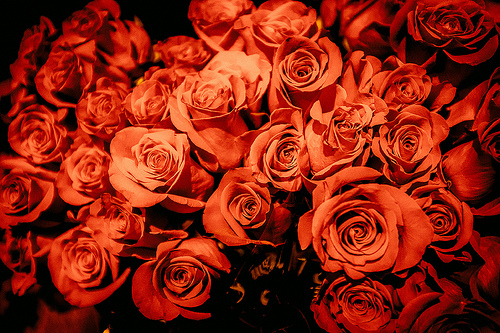

In [15]:
PIL.Image.open(str(roses[2]))

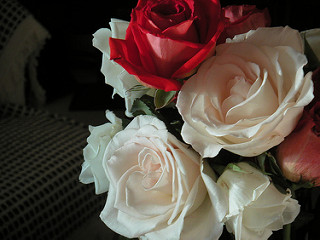

In [16]:
PIL.Image.open(str(roses[1]))

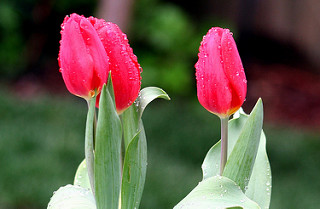

In [17]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

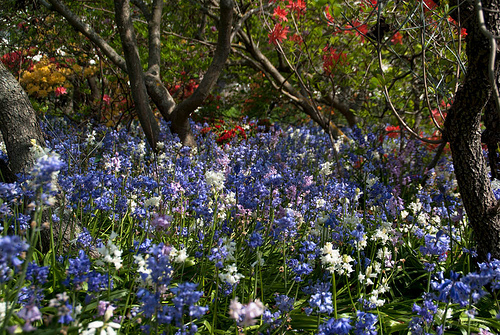

In [19]:
PIL.Image.open(str(tulips[1]))

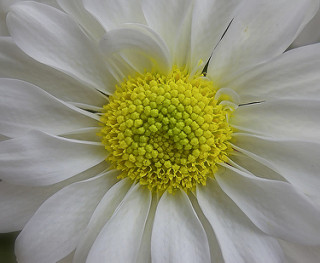

In [20]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

Now i'm going to take all my flowers path into dictionary

In [21]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [22]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [23]:
flowers_images_dict['dandelion']

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/1074999133_1e4a1e042e.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10777398353_5a20bb218c.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10778387133_9141024b

Now i'm going to give a class Number to my each of the flowers

In [24]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

Now i'm going to transform the flower image into computer vision object

In [25]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [26]:
cv2.imread(flowers_images_dict['roses'][0])

TypeError: Can't convert object to 'str' for 'filename'

#### we get an error since the computer vision will not convert the image into cv object if it is in windowpath , we want to convert it into string format

In [27]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [30]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [31]:
img.shape

(240, 179, 3)

Here the dimension represents , first one is row,second one is column and last one is rgb channel

#### Actually the dimensions of different image is different , so we want to convert it all into one for training.

In [32]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

Now i converted the one image into (180,180,3) dimension

In [58]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [59]:
X = np.array(X)
y = np.array(y)


In [37]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [38]:
y[0]

0

### Train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### preprocessing :scale images

In [36]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [39]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [40]:
X_test_scaled[0]

array([[[0.00784314, 0.10588235, 0.04705882],
        [0.01176471, 0.1254902 , 0.0627451 ],
        [0.00784314, 0.13333333, 0.06666667],
        ...,
        [0.01568627, 0.03921569, 0.03529412],
        [0.01960784, 0.03921569, 0.03529412],
        [0.01960784, 0.03137255, 0.03137255]],

       [[0.        , 0.0745098 , 0.01960784],
        [0.00392157, 0.09411765, 0.03529412],
        [0.        , 0.10196078, 0.03921569],
        ...,
        [0.01176471, 0.03137255, 0.02745098],
        [0.02352941, 0.03529412, 0.03529412],
        [0.01176471, 0.01960784, 0.01960784]],

       [[0.01568627, 0.05882353, 0.01960784],
        [0.00784314, 0.0745098 , 0.02352941],
        [0.        , 0.08235294, 0.02352941],
        ...,
        [0.02352941, 0.03137255, 0.03137255],
        [0.01960784, 0.02745098, 0.02745098],
        [0.01176471, 0.01960784, 0.01960784]],

       ...,

       [[0.00392157, 0.10980392, 0.05882353],
        [0.00392157, 0.08627451, 0.03921569],
        [0.        , 0

#### build a convolutional neural network and train it

In [41]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)     

Epoch 1/30
86/86 [==============================] - 36s 405ms/step - loss: 1.2566 - accuracy: 0.4775
Epoch 2/30
86/86 [==============================] - 33s 385ms/step - loss: 0.9181 - accuracy: 0.6337
Epoch 3/30
86/86 [==============================] - 33s 388ms/step - loss: 0.7443 - accuracy: 0.7126
Epoch 4/30
86/86 [==============================] - 35s 403ms/step - loss: 0.5719 - accuracy: 0.7867
Epoch 5/30
86/86 [==============================] - 38s 437ms/step - loss: 0.3727 - accuracy: 0.8601
Epoch 6/30
86/86 [==============================] - 36s 422ms/step - loss: 0.2173 - accuracy: 0.9324
Epoch 7/30
86/86 [==============================] - 37s 430ms/step - loss: 0.1078 - accuracy: 0.9698
Epoch 8/30
86/86 [==============================] - 34s 397ms/step - loss: 0.0901 - accuracy: 0.9753
Epoch 9/30
86/86 [==============================] - 34s 395ms/step - loss: 0.0492 - accuracy: 0.9898
Epoch 10/30
86/86 [==============================] - 34s 398ms/step - loss: 0.0299 - accura

In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 118ms/step - loss: 2.0731 - accuracy: 0.6601


[2.0730791091918945, 0.6601307392120361]

##### We can see our model only give 66% accrucy on test data. That means this is an example of overfitting.

In [43]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 3s 114ms/step


array([[  7.675448 ,  24.202799 ,   1.2424752,  -5.271111 ,  -1.3317765],
       [ 10.355524 ,  -1.6798128,  -6.669639 ,  -3.0158703,   4.886593 ],
       [ -2.723049 ,   4.2254868,  16.080091 , -12.0769205,  -3.9765391],
       ...,
       [  4.7550488,  -6.913129 ,  -4.0147815,  13.265767 ,   4.354727 ],
       [  9.467226 ,   7.653195 ,  -5.6296096,  -2.4707007,   1.6391644],
       [  4.8684764, -17.547653 ,   3.0323696,   9.183964 ,   4.8242726]],
      dtype=float32)

To see the predictions in between 0 and 1 tensorflow has a function called softmax()

In [45]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.6414430e-08, 9.9999988e-01, 1.0677221e-10, 1.5835937e-13,
       8.1372027e-12], dtype=float32)>

In [46]:
np.argmax(score)

1

In [47]:
y_test[0]

1

This first sample it's work okey, however it has only 65% accuracy

##### To overcome this problem we will use the concept of Data Augmentation

original image

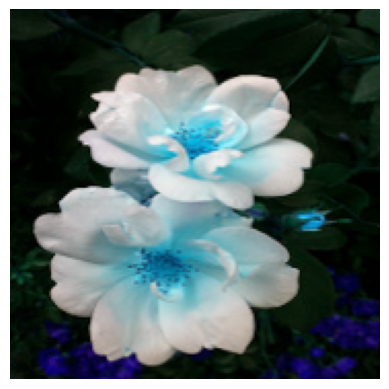

In [60]:
plt.axis('off')
plt.imshow(X[0])

In [61]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [62]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 7.1618495, 20.79255  , 12.4772   ],
        [ 6.6983414, 20.542534 , 12.440676 ],
        [ 5.9828176, 20.84541  , 10.8373575],
        ...,
        [21.65152  , 46.175407 , 29.012747 ],
        [21.813187 , 46.65738  , 31.080631 ],
        [24.377867 , 49.008568 , 33.431816 ]],

       [[11.567492 , 20.968998 , 13.645999 ],
        [10.677    , 20.292    , 12.969    ],
        [ 9.015299 , 20.42215  , 11.091099 ],
        ...,
        [20.65625  , 43.7554   , 29.330643 ],
        [21.208654 , 44.073322 , 30.531654 ],
        [23.26906  , 46.59206  , 32.59206  ]],

       [[13.195781 , 20.88043  , 13.88043  ],
        [11.992351 , 19.99235  , 12.99235  ],
        [10.330649 , 20.3387   , 11.330649 ],
        ...,
        [18.986538 , 41.650494 , 27.32259  ],
        [21.322998 , 44.768497 , 28.098747 ],
        [22.312815 , 45.982162 , 28.635412 ]],

       ...,

       [[ 9.801664 , 21.328098 , 13.763008 ],
        [10.1

Now i transformed a image using Data augmentation

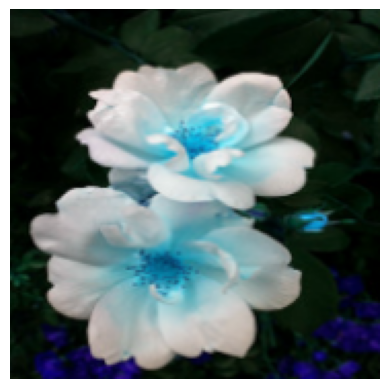

In [64]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

If i increase the size of the Augmented transform

In [68]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9)
])

In [69]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[3.50771689e+00, 1.13701859e+01, 3.73228455e+00],
        [8.83207738e-01, 5.00918913e+00, 8.83207738e-01],
        [1.25558525e-02, 2.03159499e+00, 1.25558525e-02],
        ...,
        [9.80957031e-01, 8.96839905e+00, 1.99351537e+00],
        [3.46583217e-01, 7.34052467e+00, 1.89785004e+00],
        [1.87717426e+00, 7.97155380e+00, 2.76855707e+00]],

       [[1.33320546e+00, 7.44014549e+00, 2.65342259e+00],
        [1.32148361e+00, 5.43657970e+00, 2.85538483e+00],
        [1.96964550e+00, 4.64942646e+00, 2.65554714e+00],
        ...,
        [1.64169884e+00, 9.64169884e+00, 1.99353957e+00],
        [1.45436764e+00, 8.88490772e+00, 2.56946564e+00],
        [1.68103027e+00, 6.90727997e+00, 2.13706803e+00]],

       [[3.59563828e-01, 3.07615662e+00, 7.25200176e-01],
        [1.66720104e+00, 3.71173859e+00, 2.04419899e+00],
        [9.41082984e-02, 2.11350989e+00, 1.07615662e+00],
        ...,
        [1.99963748e+00, 1.09619

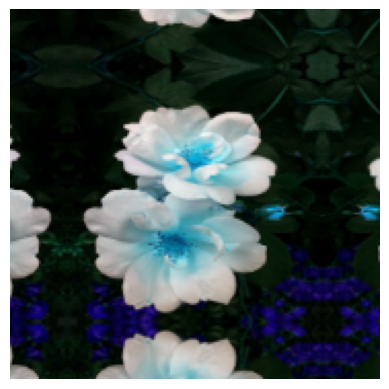

In [70]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Now we can see that the difference in sizes in images.Since we used RandomZoom augmentation. There are other augmentation techniques like RandomRotation, RandomFlip etc

In [72]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9)
])

In [73]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ],
        ...,
        [ 0.       , 32.122337 ,  3.8067017],
        [ 2.867035 , 33.612297 ,  5.2966614],
        [ 4.3569946, 35.102257 ,  6.786621 ]],

       [[ 0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ],
        ...,
        [ 0.       , 23.182579 ,  2.316742 ],
        [ 0.       , 27.652458 ,  6.786621 ],
        [ 4.3569946, 32.122337 , 11.2565   ]],

       [[ 0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ],
        ...,
        [ 0.       , 21.69262  ,  2.316742 ],
        [ 0.       , 24.672539 ,  3.8067017],
        [ 2.867035 , 29.142418 ,  8.276581 ]],

       ...,

       [[ 0.       ,  0.       ,  0.       ],
        [ 0. 

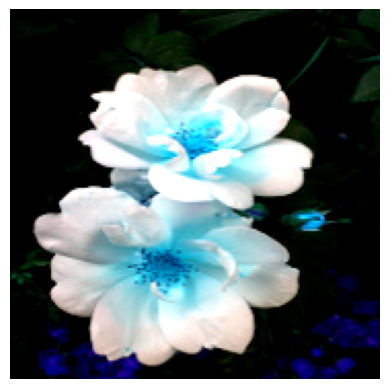

In [74]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Now we can see that the difference in color , since we used RandomContrast Augmentation technique.

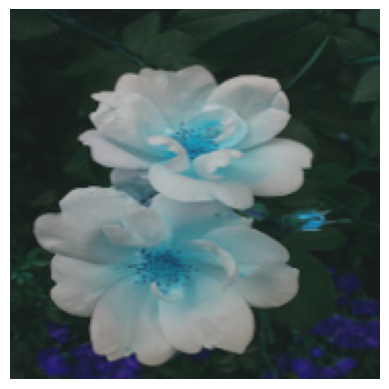

In [75]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [76]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.9)
])

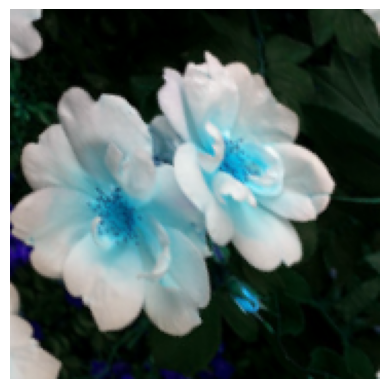

In [77]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

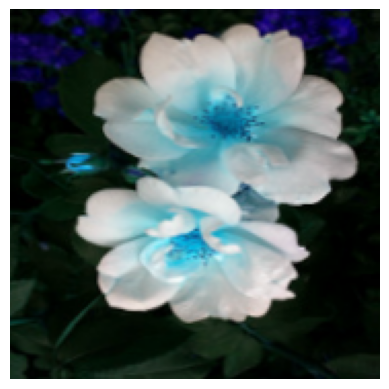

In [78]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [80]:
img_height = 180
img_width = 180

In [81]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_width, 
                                                              img_height,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [82]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 43s 478ms/step - loss: 1.3495 - accuracy: 0.4015
Epoch 2/30
86/86 [==============================] - 41s 474ms/step - loss: 1.0441 - accuracy: 0.5767
Epoch 3/30
86/86 [==============================] - 41s 480ms/step - loss: 0.9709 - accuracy: 0.6137
Epoch 4/30
86/86 [==============================] - 45s 523ms/step - loss: 0.8753 - accuracy: 0.6515
Epoch 5/30
86/86 [==============================] - 46s 530ms/step - loss: 0.8356 - accuracy: 0.6766
Epoch 6/30
86/86 [==============================] - 46s 538ms/step - loss: 0.7946 - accuracy: 0.6908
Epoch 7/30
86/86 [==============================] - 42s 492ms/step - loss: 0.7185 - accuracy: 0.7198
Epoch 8/30
86/86 [==============================] - 40s 467ms/step - loss: 0.7118 - accuracy: 0.7257
Epoch 9/30
86/86 [==============================] - 42s 489ms/step - loss: 0.6709 - accuracy: 0.7416
Epoch 10/30
86/86 [==============================] - 42s 485ms/step - loss: 0.6489 - accura

In [83]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 116ms/step - loss: 1.0270 - accuracy: 0.7505


[1.0270142555236816, 0.7505446672439575]

We can see the increase in the performance of the model , by using the data augmentation techniques.